<a href="https://colab.research.google.com/github/NQT2906/CS114.K21/blob/master/CuoiKy_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Unzip file image**



*   Import thư viện zipfile để tiến hành giải nén ảnh trong file zip.
*   Sử dụng phương thức extractall để giải nén ảnh từ file zip ở trên vào folder được gán trong phương thức extractall.



In [3]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Máy học_Thầy Duy/Train_Hole.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/Train_Hole')

with zipfile.ZipFile('/content/drive/My Drive/Máy học_Thầy Duy/Train_No_Hole.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/Train_No_Hole')

with zipfile.ZipFile('/content/drive/My Drive/Máy học_Thầy Duy/Test_Hole.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/Test_Hole')

with zipfile.ZipFile('/content/drive/My Drive/Máy học_Thầy Duy/Test_No_Hole.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/Test_No_Hole')

# **Define load data**

In [4]:
import cv2
import glob
import imageio



*   for im_path in glob.glob(path) là một vòng lặp sẽ chạy qua các phần tử có trong path.
*   cv2.imread là 1 phương thức của thư viện cv2. Dùng để đọc hình ảnh.
*   cv2.cvtColor là 1 phương thức của thư viện cv2. Dùng để thay đổi màu sắc cho ảnh được truyền vào. Ở đây cv_img là ảnh muốn thay đổi màu, cv2.COLOR_BGR2GRAY là thay đổi phông màu gốc sang phông màu có mã BGR2GRAY
*   Tiến hành thêm vào đuôi của chuỗi X và nhãn cho chuỗi Y





In [5]:
def load_data(path, X, y, result):
    for im_path in glob.glob(path):
        cv_img = cv2.imread(im_path);     
        gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY) 
        img = cv2.resize(gray,(150,150))   
        X.append(img)
        y.append(result)

In [6]:
X_train = []
Y_train = []
X_test = []
Y_test = []

# **Load data to X and Y**

In [7]:
load_data('/content/Train_Hole/*', X_train, Y_train, 1)
load_data('/content/Train_No_Hole/*', X_train, Y_train, 0)
load_data('/content/Test_Hole/*', X_test, Y_test, 1)
load_data('/content/Test_No_Hole/*', X_test, Y_test, 0)

In [8]:
import matplotlib.pyplot as plt

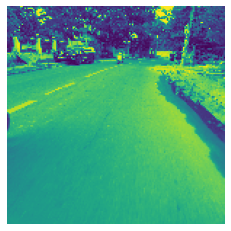

In [9]:
plt.imshow(X_train[121])
plt.axis('off')
plt.show()

# **Use Hog to extract features**

In [10]:
from skimage import data, color, feature
import skimage.data

In [11]:
hog_vec_train = []
hog_vec_test = []



*   feature.hog là phương thức của thư viện skimage dùng để trích xuất đặc trưng (HOG) của phần tử được truyền vào.



In [12]:
for i in range(0, len(X_train)):
  hog_vec_train.append(feature.hog(X_train[i]))
for i in range(0, len(X_test)):
  hog_vec_test.append(feature.hog(X_test[i]))

Tiến hành visualize feature mà HOG trích xuất được.

Text(0.5, 1.0, 'Visualization of HOG features')

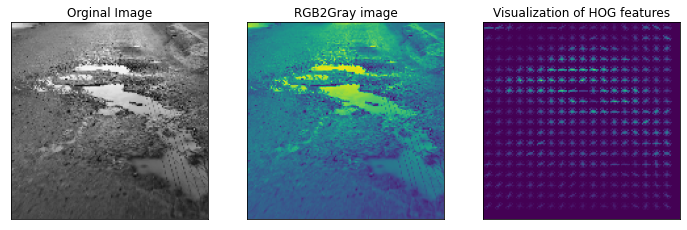

In [15]:
input_image = X_train[10]

gray_image = color.rgb2gray(input_image)

hog_vec, hog_vis = feature.hog(gray_image, visualize = True)

fig, ax = plt.subplots(1, 3, figsize=(12, 6),
                       subplot_kw = dict(xticks=[], yticks=[]))
ax[0].imshow(input_image, cmap = 'gray')
ax[0].set_title('Orginal Image')
ax[1].imshow(gray_image)
ax[1].set_title('RGB2Gray image')
ax[2].imshow(hog_vis)
ax[2].set_title('Visualization of HOG features')

# **Train model (Logistic and SVM)**

**Logistic**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Accuracy score train: 1.0
Accuracy score test: 0.8666666666666667
Confusion matrix:
[[28  2]
 [ 6 24]]


<Figure size 648x1080 with 0 Axes>

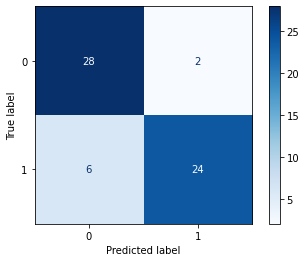

In [17]:
logis = LogisticRegression(random_state = 0)
logis.fit(hog_vec_train, Y_train)

Y_train_pred_logis = logis.predict(hog_vec_train)
Y_test_pred_logis = logis.predict(hog_vec_test)

print('Accuracy score train:', accuracy_score(Y_train, Y_train_pred_logis))
print('Accuracy score test:', accuracy_score(Y_test, Y_test_pred_logis))

cm = confusion_matrix(Y_test, Y_test_pred_logis)
print('Confusion matrix:')
print(cm)
plt.figure(figsize = (9, 15))
plot_confusion_matrix(logis, hog_vec_test, Y_test, cmap = plt.cm.Blues)

**SVM**

In [18]:
from sklearn.svm import SVC

In [19]:
svm = SVC(kernel = "linear")
svm.fit(hog_vec_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
Y_train_pred_svm = svm.predict(hog_vec_train)

cm = confusion_matrix(Y_train, svm.predict(hog_vec_train))
print("Confusion matrix of data train:")
print(cm)
print('Accuracy score train:', accuracy_score(Y_train, Y_train_pred_svm))

Confusion matrix of data train:
[[120   0]
 [  0 120]]
Accuracy score train: 1.0


Do data không đa dạng. Nên tập train 1.0. Không có sự đa dạng về góc chụp, ánh sáng, vật cản.


In [33]:
Y_test_pred_svm = svm.predict(hog_vec_test)

cm = confusion_matrix(Y_test, svm.predict(hog_vec_test))
print("Confusion matrix of data test:")
print(cm)
print('Accuracy score test:', accuracy_score(Y_test, Y_test_pred_svm))

Confusion matrix of data test:
[[28  2]
 [ 7 23]]
Accuracy score test: 0.85


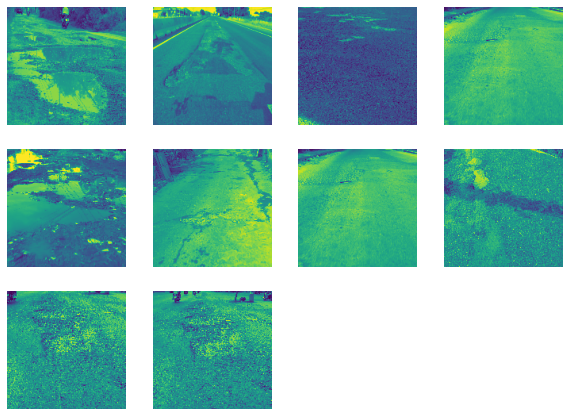

In [22]:
plt.figure(figsize = (10, 10))
for i in range(10):
  plt.subplot(4, 4, i+1)
  plt.imshow(X_train[i])
  plt.axis('off')

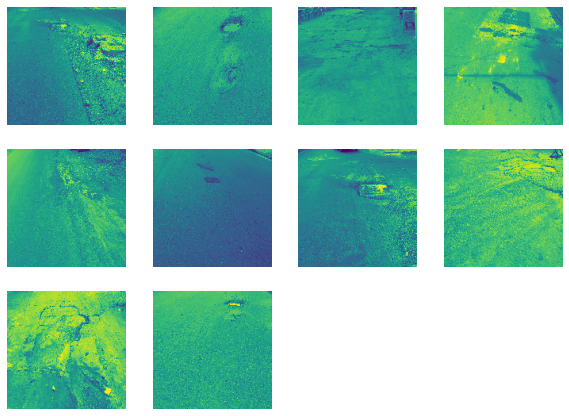

In [23]:
plt.figure(figsize = (10, 10))
for i in range(10):
  plt.subplot(4, 4, i+1)
  plt.imshow(X_test[i])
  plt.axis('off')

In [26]:
from sklearn.metrics import classification_report

In [30]:
print('Logistic report in Test data: ')
print(classification_report(Y_test, logis.predict(hog_vec_test)))

Logistic report in Test data: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        30
           1       0.92      0.80      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [31]:
print('SVM report in Test data: ')
print(classification_report(Y_test, svm.predict(hog_vec_test)))

SVM report in Test data: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        30

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



# **Save model**

In [61]:
import pickle

filename = 'Logistic_model.sav'
pickle.dump(logis, open(filename, 'wb'))

filename = 'SVM_model.sav'
pickle.dump(svm, open(filename, 'wb'))

# **Check with real data**

**Clone data from git**

In [62]:
!git clone -b master https://github.com/NQT2906/CS114.K21.git Dataset

Cloning into 'Dataset'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 880 (delta 3), reused 5 (delta 1), pack-reused 870
Receiving objects: 100% (880/880), 968.77 MiB | 33.71 MiB/s, done.
Resolving deltas: 100% (106/106), done.


**Upload image**

In [ ]:
from google.colab import files
image = files.upload()

In [63]:
import pickle

pretrained_logistic = pickle.load(open('/content/Dataset/Logistic_model.sav', 'rb'))
pretrained_svm = pickle.load(open('/content/Dataset/SVM_model.sav', 'rb'))

In [66]:
from sklearn.metrics import classification_report

X_real = []
Y_real = []
image_hog = []

for im_path in glob.glob("/content/Hole/*.jpg"):
  image = cv2.imread(im_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(gray,(150,150))   
  X_real.append(img)
  Y_real.append(1)
for im_path in glob.glob("/content/No_Hole/*.jpg"):
  image = cv2.imread(im_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   
  img = cv2.resize(gray,(150,150))   
  X_real.append(img)
  Y_real.append(0)

for i in range(0, len(X_real)):
  image_hog.append(feature.hog(X_real[i]))

Y_real_svm_pred = pretrained_svm.predict(image_hog)
Y_real_logis_pred = pretrained_logistic.predict(image_hog)

cm_logis = confusion_matrix(Y_real, Y_real_logis_pred)
print("Confusion matrix logistics:")
print(cm_logis)
print('Logistic report in Test data: ')
print(classification_report(Y_real, pretrained_logistic.predict(image_hog)))

cm_svm = confusion_matrix(Y_real, Y_real_svm_pred)
print("Confusion matrix svm:")
print(cm_svm)
print('Logistic report in Test data: ')
print(classification_report(Y_real, pretrained_svm.predict(image_hog)))

Confusion matrix logistics:
[[3 2]
 [0 6]]
Logistic report in Test data: 
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.75      1.00      0.86         6

    accuracy                           0.82        11
   macro avg       0.88      0.80      0.80        11
weighted avg       0.86      0.82      0.81        11

Confusion matrix svm:
[[3 2]
 [0 6]]
Logistic report in Test data: 
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.75      1.00      0.86         6

    accuracy                           0.82        11
   macro avg       0.88      0.80      0.80        11
weighted avg       0.86      0.82      0.81        11



# **CNN**

In [34]:
import numpy as np

In [35]:
def load_data_cnn(path, X, y, result):
    for im_path in glob.glob(path):
        cv_img = cv2.imread(im_path);     
        #gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY) 
        img = cv2.resize(cv_img,(150,150))   
        X.append(np.array(img))
        y.append(np.array(result))

In [54]:
X_train = []
Y_train = []
X_test = []
Y_test = []

In [55]:
load_data_cnn('/content/Train_Hole/*', X_train, Y_train, 1)
load_data_cnn('/content/Train_No_Hole/*', X_train, Y_train, 0)
load_data_cnn('/content/Test_Hole/*', X_test, Y_test, 1)
load_data_cnn('/content/Test_No_Hole/*', X_test, Y_test, 0)

In [56]:
X_train, Y_train, X_test, Y_test = np.array(X_train), np.array(Y_train), np.array(X_test), np.array(Y_test)

In [ ]:
np.shape(X_train[0])

(150, 150, 3)

In [ ]:
X_train.shape

(240, 150, 150, 3)

In [57]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [40]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [44]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [45]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [46]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
240/240 [==============================] - 11s 48ms/step - loss: 0.6595 - acc: 0.6208
Epoch 2/10
240/240 [==============================] - 11s 48ms/step - loss: 0.4626 - acc: 0.7875
Epoch 3/10
240/240 [==============================] - 11s 47ms/step - loss: 0.3146 - acc: 0.8583
Epoch 4/10
240/240 [==============================] - 12s 48ms/step - loss: 0.2902 - acc: 0.8708
Epoch 5/10
240/240 [==============================] - 11s 48ms/step - loss: 0.2513 - acc: 0.8875
Epoch 6/10
240/240 [==============================] - 11s 47ms/step - loss: 0.2658 - acc: 0.8708
Epoch 7/10
240/240 [==============================] - 11s 48ms/step - loss: 0.2366 - acc: 0.8750
Epoch 8/10
240/240 [==============================] - 11s 47ms/step - loss: 0.2149 - acc: 0.8958
Epoch 9/10
240/240 [==============================] - 11s 47ms/step - loss: 0.2277 - acc: 0.9000
Epoch 10/10
240/240 [==============================] - 11s 47ms/step - loss: 0.1970 - acc: 0.9208


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train_pred = np.around(model.predict(X_train))
X_train_pred

In [60]:
print('CNN report in Test data: ')
print(classification_report(Y_test, np.around(model.predict(X_test))))

CNN report in Test data: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.82      0.93      0.87        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
print('Accuracy score train: ')
print(accuracy_score(Y_train, X_train_pred))

Accuracy score train: 
0.9125


In [ ]:
print('Accuracy score test: ')
print(accuracy_score(Y_test, np.around(model.predict(X_test))))

Accuracy score test: 
0.8833333333333333


Text(0.5, 1.0, 'Confusion matrix in Test data')

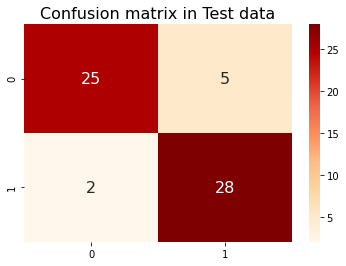

In [ ]:
sns.heatmap(confusion_matrix(Y_test, np.around(model.predict(X_test))), 
            cmap="OrRd", annot = True, annot_kws = {"size": 16}, )
plt.title('Confusion matrix in Test data', fontsize = 16)

In [ ]:
from keras.models import load_model

model.save('CNN.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [ ]:
model = load_model('CNN.h5')